In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\aiml\ml\supervised\breast cancer\breast_cancer.csv')

In [3]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [4]:
cat=['Race','Marital Status','N Stage','6th Stage','differentiate','A Stage','Estrogen Status','Progesterone Status','Status','Survival Months','Grade']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [7]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

<Axes: xlabel='Survival Months', ylabel='Count'>

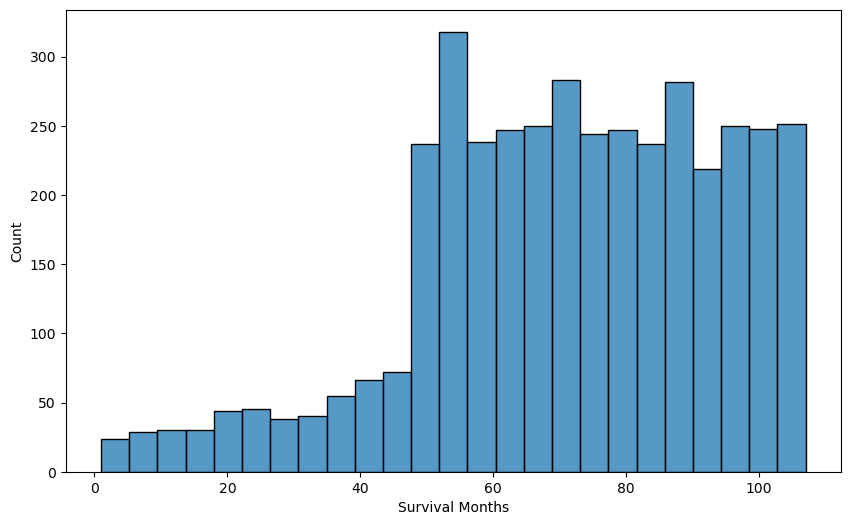

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Survival Months'])

<Axes: xlabel='Marital Status', ylabel='count'>

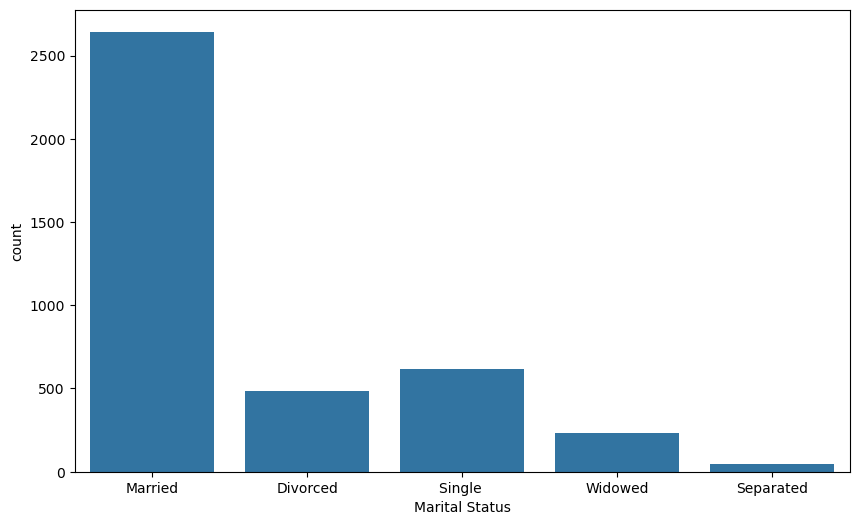

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='Marital Status',data=df)

<Axes: xlabel='Age', ylabel='Tumor Size'>

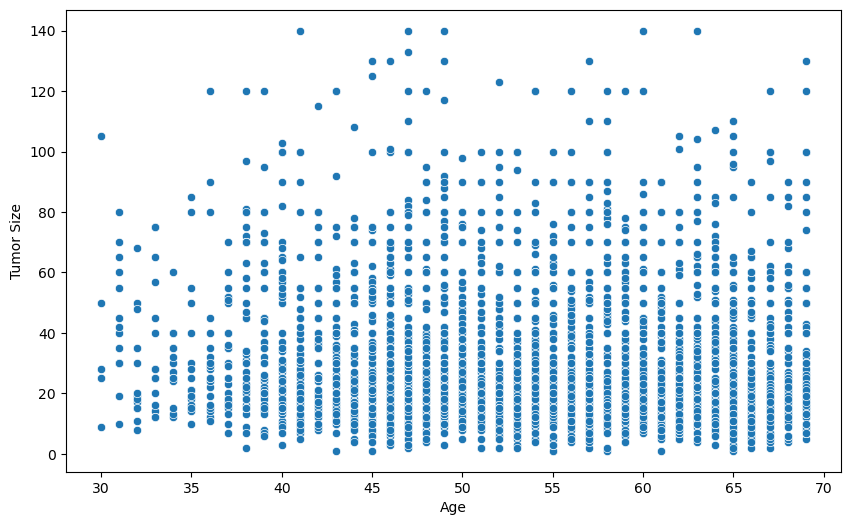

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Tumor Size',data=df)

In [11]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [12]:
for col in cat:
    df[col] = l.fit_transform(df[col])

In [13]:
df['T Stage '] = df['T Stage '].replace({'T1': 0, 'T2': 1,'T3':2,'T4':3})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13184\2594004787.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['T Stage '] = df['T Stage '].replace({'T1': 0, 'T2': 1,'T3':2,'T4':3})


In [14]:
df.corr()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Age,1.000000,0.079734,0.050832,-0.066914,0.002883,-0.018741,0.015697,-0.093216,0.020860,-0.077215,0.059787,-0.021269,-0.033345,0.012586,-0.009390,0.055921
Race,0.079734,1.000000,-0.111417,0.001082,-0.032125,-0.025282,-0.018759,-0.057032,0.007005,-0.004082,0.057652,0.034351,-0.004778,-0.014604,0.040571,-0.050040
Marital Status,0.050832,-0.111417,1.000000,0.009318,0.013168,0.002989,0.031639,-0.004283,0.004936,0.007407,-0.017895,-0.013485,-0.004285,0.005849,-0.025593,0.033289
T Stage,-0.066914,0.001082,0.009318,1.000000,0.277015,0.606711,-0.031355,0.110220,-0.221124,0.809176,-0.060954,-0.057633,0.114102,0.243075,-0.085718,0.154699
N Stage,0.002883,-0.032125,0.013168,0.277015,1.000000,0.881880,-0.036249,0.148791,-0.260573,0.277905,-0.101995,-0.093723,0.328276,0.838073,-0.139577,0.255772
6th Stage,-0.018741,-0.025282,0.002989,0.606711,0.881880,1.000000,-0.042286,0.169986,-0.291962,0.513971,-0.105614,-0.101246,0.317219,0.773963,-0.144837,0.257636
differentiate,0.015697,-0.018759,0.031639,-0.031355,-0.036249,-0.042286,1.000000,-0.365422,-0.008977,-0.028391,-0.021826,0.008957,-0.057248,-0.028339,-0.004500,-0.018513
Grade,-0.093216,-0.057032,-0.004283,0.110220,0.148791,0.169986,-0.365422,1.000000,-0.043701,0.099539,-0.186770,-0.175816,0.083446,0.122931,-0.058408,0.134170
A Stage,0.020860,0.007005,0.004936,-0.221124,-0.260573,-0.291962,-0.008977,-0.043701,1.000000,-0.123883,0.065570,0.026530,-0.069010,-0.232849,0.070109,-0.096584
Tumor Size,-0.077215,-0.004082,0.007407,0.809176,0.277905,0.513971,-0.028391,0.099539,-0.123883,1.000000,-0.059585,-0.069879,0.104352,0.242322,-0.086901,0.134205


In [15]:
x=df.drop('Status',axis=1)
y=df['Status']


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
l=LogisticRegression()
l.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
pred = l.predict(x_train)
accuracy = accuracy_score(y_train, pred)
matrix = confusion_matrix(y_train, pred)
report = classification_report(y_train, pred)
print(accuracy)
print(matrix)
print(report)

0.8974836905871388
[[2677   62]
 [ 268  212]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2739
           1       0.77      0.44      0.56       480

    accuracy                           0.90      3219
   macro avg       0.84      0.71      0.75      3219
weighted avg       0.89      0.90      0.89      3219



In [19]:
pred = l.predict(x_test)
accuracy = accuracy_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)
report = classification_report(y_test, pred)
print(accuracy)
print(matrix)
report

0.8968944099378882
[[656  13]
 [ 70  66]]


'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94       669\n           1       0.84      0.49      0.61       136\n\n    accuracy                           0.90       805\n   macro avg       0.87      0.73      0.78       805\nweighted avg       0.89      0.90      0.89       805\n'

In [20]:
test=l.predict(x_test)
acc=accuracy_score(y_test,test)
acc

0.8968944099378882

In [21]:
r=RandomForestClassifier(n_estimators=100)
r.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
train=r.predict(x_train)
acc=accuracy_score(y_train,train)
acc

0.9996893445169307

In [23]:
test=r.predict(x_test)
acc=accuracy_score(y_test,test)
acc

0.9043478260869565

In [24]:
from sklearn.linear_model import Lasso,Ridge
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [25]:
from sklearn.metrics import r2_score
train=lasso.predict(x_train)
r2_train=r2_score(y_train,train)
r2_train

0.2673095515796131

In [26]:
test=lasso.predict(x_test)
r2_test=r2_score(y_test,test)
r2_test

0.2534733393915576

In [27]:
train=ridge.predict(x_train)
r2_train=r2_score(y_train,train)
r2_train

0.2997669751310639

In [28]:
test=ridge.predict(x_test)
r2_test=r2_score(y_test,test)
r2_test

0.2969127213984595

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_tr_s=scaler.fit_transform(x_train)
x_te_s=scaler.transform(x_test)

In [30]:
train=lasso.predict(x_tr_s)
r2_tr_sc=r2_score(y_train,train)
r2_tr_sc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


-1.2678963016281672

In [31]:
test=lasso.predict(x_te_s)
r2_te_sc=r2_score(y_test,test)
r2_te_sc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


-1.0352570356378608

In [32]:
train=ridge.predict(x_tr_s)
r2=r2_score(y_train,train)
r2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


-1.2808905678325249

In [33]:
test=ridge.predict(x_te_s)
r2=r2_score(y_test,test)
r2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


-1.0020533799680669

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(x_tr_s,y_train)

KNeighborsClassifier(n_neighbors=100)

In [35]:
train=knn.predict(x_tr_s)
acc=accuracy_score(y_train,train)
acc

0.8614476545511028

In [36]:
test=knn.predict(x_te_s)
acc=accuracy_score(y_test,test)
acc

0.8422360248447205

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_tr_s,y_train)

SVC(kernel='linear', random_state=42)

In [38]:
train=svm.predict(x_tr_s)
acc=accuracy_score(y_train,train)
acc

0.8909599254426841

In [39]:
test=svm.predict(x_te_s)
acc=accuracy_score(y_test,test)
acc

0.8956521739130435

In [40]:
from joblib import dump
dump(l,'breast_cancer.joblib')

['breast_cancer.joblib']